# Data exploration about the recent history of the Olympic Games

Hey, thanks for viewing my Kernel!

If you like my work, please, leave an upvote: it will be really appreciated and it will motivate me in offering more content to the Kaggle community ! :)

Today, we will explore a dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016.

### Index of content

1. Data Cleaning

    1.1 Impute Missing Values
    
    1.2 Drop Constant Columns
    
    1.3 Matching Incorrectly Spelt Words
    
    1.4 Delete Sports With Less Than One Participant
    
2. Data Prepartion

3. Data Analysis

4. Time Series Predictions

    3.1 Prophet
    
    3.2 Darts Models
    
    3.3 Arima
    
    3.4 Sarimax
    
    3.5 Monta Carlo Simulation
    
5. Summary

## 1. Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import statsmodels.api as sm

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
warnings.simplefilter("ignore")
np.random.seed(0)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}
#matplotlib.rc('font', **font)
sns.set(font_scale=2)

/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


In [2]:
data = pd.read_csv('../input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')

In [3]:
data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [4]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


#### 1.1 Impute Missing Values

In [6]:
data_clean = data.copy()
data_clean = data_clean.dropna(subset=['Medal'])
data_clean['Age'] = data.groupby(['Sport'])['Age'].transform(lambda x: x.fillna(round(x.mean(), 2)))
data_clean['Height'] = data.groupby(['Sport'])['Height'].transform(lambda x: x.fillna(round(x.mean(), 2)))
data_clean['Weight'] = data.groupby(['Sport'])['Weight'].transform(lambda x: x.fillna(round(x.mean(), 2)))
print(data_clean.isnull().sum())

ID          0
Name        0
Sex         0
Age         0
Height     75
Weight    155
Team        0
NOC         0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64


#### 1.2 Drop Constant Columns

In [7]:
data_clean.columns[data_clean.nunique() <= 1]

Index([], dtype='object')

#### 1.3 Matching Incorrectly Spelt Words

In [8]:
sport_unique = data_clean['Sport'].unique()
team_unique = data_clean['Team'].unique()

In [9]:
import fuzzywuzzy
from fuzzywuzzy import process

for sport in sport_unique:
    matches = fuzzywuzzy.process.extract(sport, sport_unique, limit=2, 
                                         scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    if matches[1][1] > 90:
        print(sport, matches[1])

for team in team_unique:
    matches = fuzzywuzzy.process.extract(team, team_unique, limit=2, 
                                         scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    if matches[1][1] > 90:
        print(team, matches[1])

Netherlands ('Netherlands-1', 92)
United States ('United States-1', 93)
Soviet Union ('Soviet Union-2', 92)
Unified Team ('Unified Team-2', 92)
Switzerland ('Switzerland-1', 92)
East Germany ('East Germany-1', 92)
Great Britain ('Great Britain-1', 93)
Switzerland-1 ('Switzerland', 92)
Switzerland-2 ('Switzerland', 92)
Czechoslovakia ('Czechoslovakia-1', 93)
United States-1 ('United States', 93)
Great Britain-1 ('Great Britain', 93)
West Germany ('West Germany-1', 92)
Soviet Union-2 ('Soviet Union-1', 93)
East Germany-1 ('East Germany-2', 93)
South Korea ('South Korea-2', 92)
South Korea-2 ('South Korea', 92)
North Korea ('North Korea-1', 92)
Great Britain-2 ('Great Britain', 93)
Elisabeth X ('Elisabeth V', 91)
Ludwigshafener Ruderverein ('Ludwigshafener Ruder Verein-1', 95)
Czech Republic ('Czech Republic-1', 93)
West Germany-1 ('West Germany-2', 93)
United States-2 ('United States', 93)
Leander Club-2 ('Leander Club-1', 93)
Chicago Athletic Association-2 ('Chicago Athletic Association

In [10]:
data_clean["Team"] = data_clean['Team'].str.replace('[^\w\s]','')
data_clean["Team"] = data_clean['Team'].str.replace('\d+', '')
data_clean['Team'] = data_clean['Team'].str.strip()

In [11]:
team_unique = data_clean['Team'].unique()
for team in team_unique:
    matches = fuzzywuzzy.process.extract(team, team_unique, limit=2, 
                                         scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    if matches[1][1] > 90:
        print(team, matches[1])

Elisabeth X ('Elisabeth V', 91)
Ludwigshafener Ruderverein ('Ludwigshafener Ruder Verein', 98)
Sirene ('Irene', 91)
Elisabeth V ('Elisabeth X', 91)
Ludwigshafener Ruder Verein ('Ludwigshafener Ruderverein', 98)
Irene ('Sirene', 91)


In [12]:
for team in team_unique:
    matches = fuzzywuzzy.process.extract(team, team_unique, limit=2, 
                                         scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    if matches[1][1] > 91:
        data_clean[data_clean['Team'] == matches[1][0]] = team

In [13]:
team_unique = data_clean['Team'].unique()
for team in team_unique:
    matches = fuzzywuzzy.process.extract(team, team_unique, limit=2, 
                                         scorer=fuzzywuzzy.fuzz.token_sort_ratio)
    if matches[1][1] > 90:
        print(team, matches[1])

Elisabeth X ('Elisabeth V', 91)
Sirene ('Irene', 91)
Elisabeth V ('Elisabeth X', 91)
Irene ('Sirene', 91)


#### 1.4 Delete Sports With Less Than One Participant

In [14]:
data_groupby = data_clean.groupby(['Sport'])
sport_list = []
for key, item in data_groupby:
    selected_df = data_groupby.get_group(key)
    
    if len(selected_df['Team'].unique()) > 2:
        sport_list.append(key)

In [15]:
data_clean = data_clean[data_clean['Sport'].isin(sport_list)]
data_clean = data_clean.dropna()

## 2. Data Prepartion

In [16]:
df_athletics = data_clean[data_clean['Sport'] == 'Athletics']
df_athletics['Medal_Num'] = 1
df_athletics_timeseries = df_athletics.groupby(['Year']).sum()
print(df_athletics_timeseries.head())
print(df_athletics_timeseries.tail())

      Medal_Num
Year           
1896         37
1900         76
1904         79
1906         65
1908        101
      Medal_Num
Year           
2000        190
2004        180
2008        187
2012        190
2016        192


In [17]:
for team in df_athletics['Team'].unique():
    selected_df = df_athletics[df_athletics['Team'] == team]
    temp_group_df = selected_df.groupby(['Year']).sum()
    df_athletics_timeseries[team] = 0
    df_athletics_timeseries.loc[temp_group_df.index, team] = temp_group_df['Medal_Num']
print(df_athletics_timeseries.head())
print(df_athletics_timeseries.tail())

      Medal_Num  Russia  Spain  Unified Team  Ethiopia  Sweden  Turkey  \
Year                                                                     
1896         37       0      0             0         0       0       0   
1900         76       0      0             0         0       1       0   
1904         79       0      0             0         0       0       0   
1906         65       0      0             0         0      11       0   
1908        101       0      0             0         0       5       0   

      United States  Great Britain  New Zealand  ...  India  Djibouti  \
Year                                             ...                    
1896             17              2            0  ...      0         0   
1900             39              8            0  ...      2         0   
1904             63              2            0  ...      0         0   
1906             23              9            0  ...      0         0   
1908             41             21         

## 3. Data Analysis

In [18]:
df_athletics_timeseries_US = df_athletics_timeseries['United States'].copy()
print(df_athletics_timeseries_US.head())
print(df_athletics_timeseries_US.tail())

Year
1896    17
1900    39
1904    63
1906    23
1908    41
Name: United States, dtype: int64
Year
2000    28
2004    38
2008    32
2012    42
2016    46
Name: United States, dtype: int64


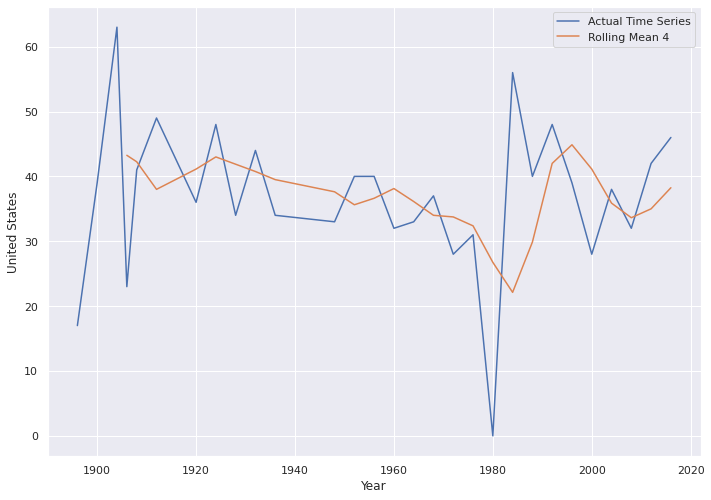

In [19]:
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(11.7,8.27)})

g = sns.lineplot(x=df_athletics_timeseries_US.index, y=df_athletics_timeseries_US, label="Actual Time Series")

rmean = df_athletics_timeseries_US.rolling(4, win_type='triang').mean()

g = sns.lineplot(x=rmean.index, y=rmean, label="Rolling Mean 4")

In [20]:
df_athletics_timeseries_US.index = pd.date_range(start='2021-04-01', end='2021-04-29', periods=29)
df_athletics_timeseries_US.index

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12',
               '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
               '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20',
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
               '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29'],
              dtype='datetime64[ns]', freq=None)

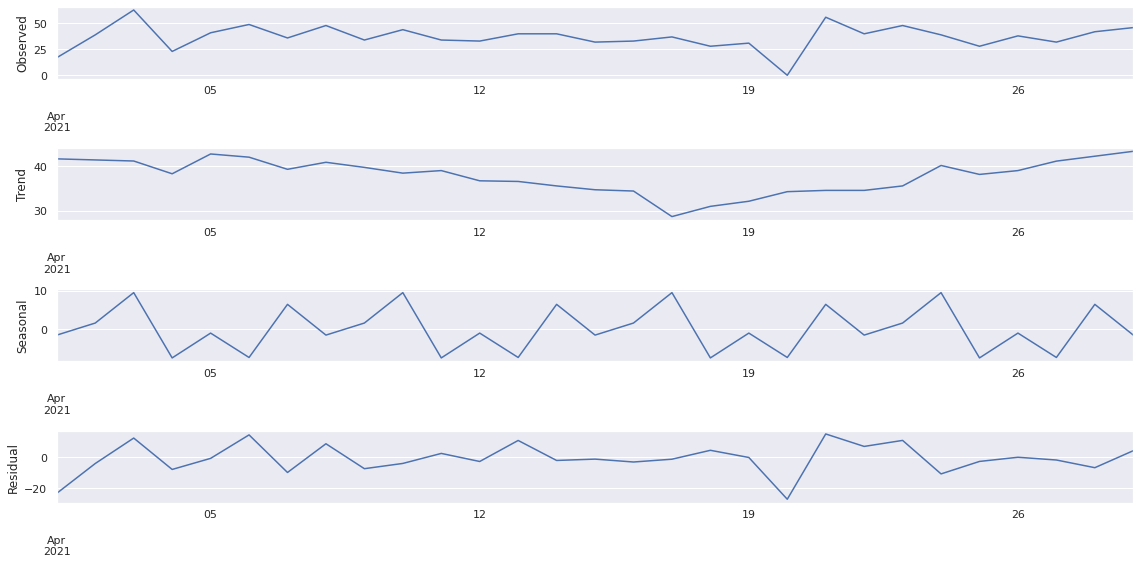

In [21]:
decompose = sm.tsa.seasonal_decompose(
    df_athletics_timeseries_US, model='additive', extrapolate_trend='freq')

# Plot.
fig, axes = plt.subplots(nrows=4, figsize=(16, 8))

decompose.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')

decompose.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')

decompose.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')

decompose.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')


plt.tight_layout()
plt.show()

In [22]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 926 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [23]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df_athletics_timeseries_US, trace=False, suppress_warning=True)
mod = sm.tsa.statespace.SARIMAX(df_athletics_timeseries_US,
                                order=stepwise_fit.order,
                                seasonal_order=(1, 1, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L4       -0.1904      0.351     -0.542      0.588      -0.879       0.498
ma.S.L4       -1.0000   8615.494     -0.000      1.000   -1.69e+04    1.69e+04
sigma2       110.9240   9.56e+05      0.000      1.000   -1.87e+06    1.87e+06


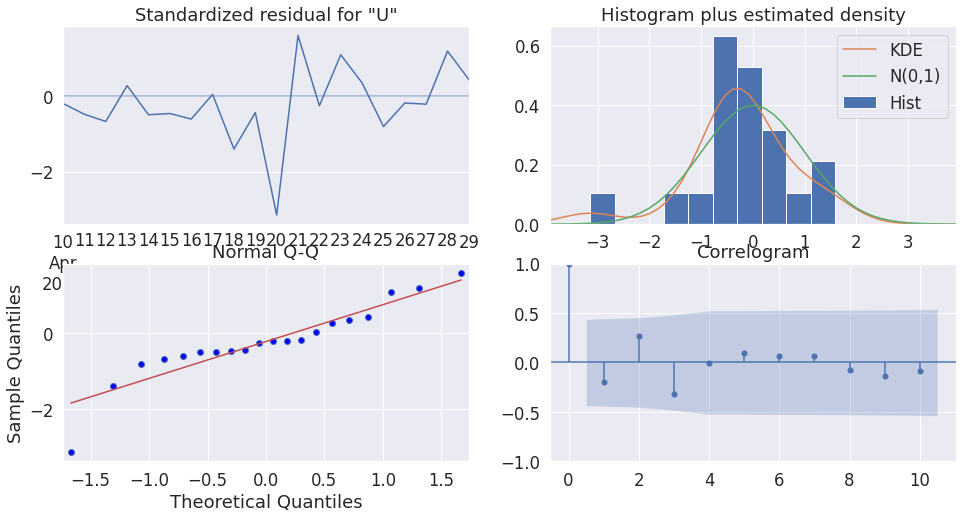

In [24]:
sns.set(font_scale=1.5)

results.plot_diagnostics(figsize=(16, 8))
plt.show()

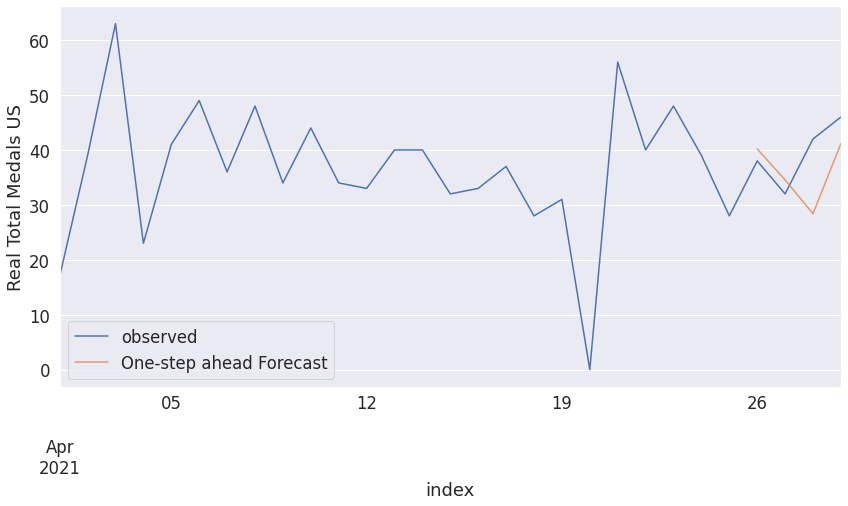

In [25]:
pred = results.get_prediction(
    start=pd.to_datetime('2021-04-26'), dynamic=False)

pred_ci = pred.conf_int()

ax = df_athletics_timeseries_US.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.8, figsize=(14, 7))

ax.set_xlabel('index')
ax.set_ylabel('Real Total Medals US')

plt.legend()
plt.show()

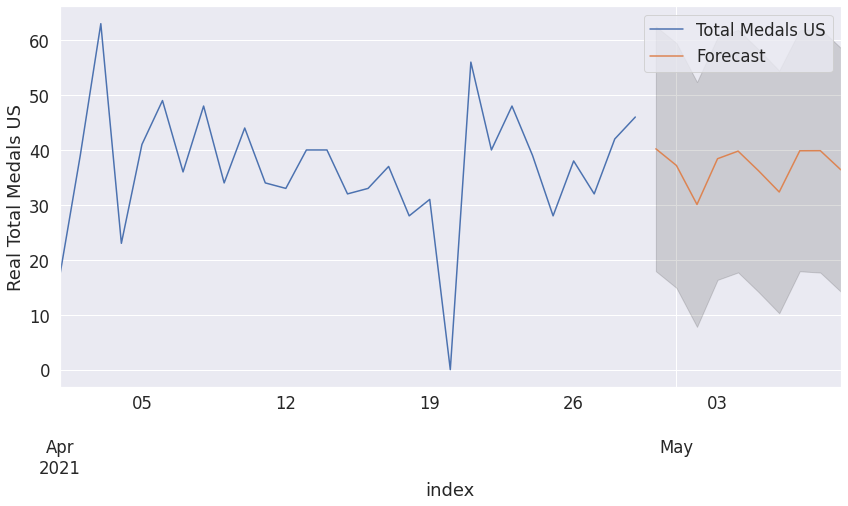

In [26]:
pred_uc = results.get_forecast(steps=10)
pred_ci = pred_uc.conf_int()

ax = df_athletics_timeseries_US.plot(label='Total Medals US', figsize=(14, 7))

pred_uc.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.15)

ax.set_xlabel('index')
ax.set_ylabel('Real Total Medals US')

plt.legend()
plt.show()

In [27]:
from fbprophet import Prophet

df_prophet = pd.DataFrame()
df_prophet['y'] = df_athletics_timeseries_US
df_prophet['ds'] = df_athletics_timeseries_US.index

model = Prophet()
model.fit(df_prophet)

In [28]:
future = model.make_future_dataframe(periods=10, freq='d')
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2021-04-01,36.912575,24.096408,49.750114
1,2021-04-02,38.729915,26.532297,51.269598
2,2021-04-03,45.975861,33.055515,58.112652
3,2021-04-04,28.489165,16.281343,41.195325
4,2021-04-05,35.984936,23.665230,47.988309


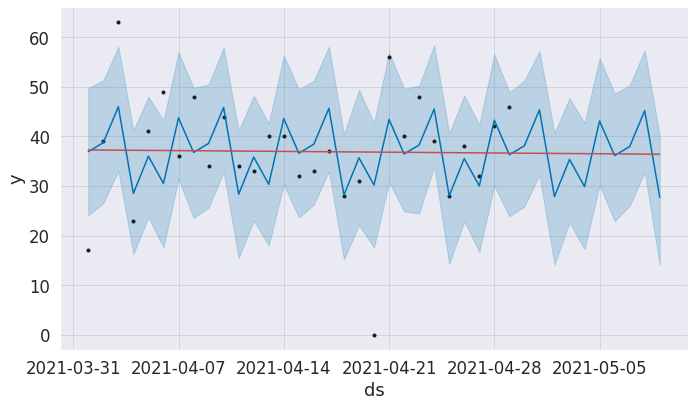

In [29]:
from fbprophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)

add_changepoints_to_plot(fig.gca(), model, forecast)

plt.show()

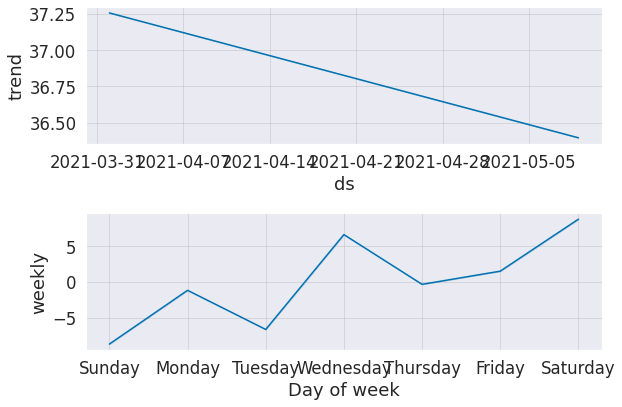

In [30]:
model.plot_components(forecast)
plt.show()

## 4. Time Series Predictions

In [31]:
pip install u8darts

     |████████████████████████████████| 253 kB 925 kB/s 
     |████████████████████████████████| 177 kB 13.0 MB/s 
     |████████████████████████████████| 22.3 MB 15.1 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110451 sha256=2cab3bf7109ef5c20997c6c565d4ded58e13a8b5061d5016ef063bc8b51a73a6
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
Successfully built filterpy
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.5 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.4.2 which is incompatible.


In [32]:
pip install auto-bots==0.0.2

     |████████████████████████████████| 43 kB 316 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [33]:
from darts import TimeSeries
import darts
from AutoTS.AutoTS import AutoTS
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import norm

from sklearn.metrics import mean_squared_error

test_size = 2

#### 4.1 Prophet

In [34]:
total_rmse = 0
for team in df_athletics['Team'].unique():
    train_test = pd.DataFrame()
    train_test['ds'] = df_athletics_timeseries.index
    train_test['y'] = df_athletics_timeseries[team].values
    
    train = train_test[:-test_size]
    test = train_test[-test_size:]
    
    model = Prophet(growth='linear')
    model.fit(train)
    future = model.make_future_dataframe(periods=test_size)
    forecast = model.predict(future)
    
    rmse = mean_squared_error(test['y'], forecast['yhat'][-test_size:], squared=False)
    total_rmse += rmse
print('Prophet RMSE: ', total_rmse/len(df_athletics['Team'].unique()))

Prophet RMSE:  3.1803562330940243


#### 4.2 Darts

##### 4.2.1 Darts - FFT

In [35]:
#total_rmse = 0
#for team in df_athletics['Team'].unique():
#    train_test = pd.DataFrame()
#    train_test['ds'] = df_athletics_timeseries.index
#    train_test['range'] = np.arange(len(df_athletics_timeseries))
#    train_test['y'] = df_athletics_timeseries[team].values
    
#    Series = TimeSeries.from_dataframe(train_test, 'range', 'y')
    
#    train, val = Series.split_before(pd.Timestamp(len(Series) - test_size))
    
#    model = darts.models.FFT()
#    model.fit(train)
#    prediction = model.predict(len(val))
#    rmse = mean_squared_error(val.values(), prediction.values(), squared=False)
#    total_rmse += rmse
#print('Darts FFT RMSE: ', total_rmse/len(df_athletics['Team'].unique()))

##### 4.2.2 Darts - ExponentialSmoothing

In [36]:
#total_rmse = 0
#for team in df_athletics['Team'].unique():
#    train_test = pd.DataFrame()
#    train_test['ds'] = df_athletics_timeseries.index
#    train_test['range'] = pd.date_range(start='2021-04-01', end='2021-04-29', periods=len(df_athletics_timeseries))
#    train_test['y'] = df_athletics_timeseries[team].values
    
#    Series = TimeSeries.from_dataframe(train_test, 'range', 'y')
    
#    train, val = Series.split_before(pd.Timestamp('2021-04-28'))
    
#    model = darts.models.ExponentialSmoothing()
#    model.fit(train)
#    prediction = model.predict(len(val))
#    rmse = mean_squared_error(val.values(), prediction.values(), squared=False)
#    total_rmse += rmse
#print('Darts ExponentialSmoothing RMSE: ', total_rmse/len(df_athletics['Team'].unique()))

##### 4.2.3 Darts - RegressionModel

In [37]:
#total_rmse = 0
#for team in df_athletics['Team'].unique():
#    train_test = pd.DataFrame()
#    train_test['ds'] = df_athletics_timeseries.index
#    train_test['range'] = np.arange(len(df_athletics_timeseries))
#    train_test['y'] = df_athletics_timeseries[team].values
    
#    Series = TimeSeries.from_dataframe(train_test, 'range', 'y')
    
#    train, val = Series.split_before(pd.Timestamp(len(Series) - test_size))
    
#    model = darts.models.RegressionModel(lags=1)
#    model.fit(train)
#    prediction = model.predict(len(val))
#    rmse = mean_squared_error(val.values(), prediction.values(), squared=False)
#    total_rmse += rmse
#print('Darts RegressionModel RMSE: ', total_rmse/len(df_athletics['Team'].unique()))

##### 4.2.4 Darts - RandomForest

In [38]:
#total_rmse = 0
#for team in df_athletics['Team'].unique():
#    train_test = pd.DataFrame()
#    train_test['ds'] = df_athletics_timeseries.index
#    train_test['range'] = np.arange(len(df_athletics_timeseries))
#    train_test['y'] = df_athletics_timeseries[team].values
    
#    Series = TimeSeries.from_dataframe(train_test, 'range', 'y')
    
#    train, val = Series.split_before(pd.Timestamp(len(Series) - test_size))
    
#    model = darts.models.RandomForest(lags=1)
#    model.fit(train)
#    prediction = model.predict(len(val))
#    rmse = mean_squared_error(val.values(), prediction.values(), squared=False)
#    total_rmse += rmse
#print('Darts RandomForest RMSE: ', total_rmse/len(df_athletics['Team'].unique()))

##### 4.2.5 Darts - LightGBMModel

In [39]:
#total_rmse = 0
#for team in df_athletics['Team'].unique():
#    train_test = pd.DataFrame()
#    train_test['ds'] = df_athletics_timeseries.index
#    train_test['range'] = np.arange(len(df_athletics_timeseries))
#    train_test['y'] = df_athletics_timeseries[team].values
    
#    Series = TimeSeries.from_dataframe(train_test, 'range', 'y')
    
#    train, val = Series.split_before(pd.Timestamp(len(Series) - test_size))
    
#    model = darts.models.LightGBMModel(lags=1)
#    model.fit(train)
#    prediction = model.predict(len(val))
#    rmse = mean_squared_error(val.values(), prediction.values(), squared=False)
#    total_rmse += rmse
#print('Darts LightGBMModel RMSE: ', total_rmse/len(df_athletics['Team'].unique()))

##### 4.2.6 Darts - Baseline Models

In [40]:
#total_rmse = 0
#for team in df_athletics['Team'].unique():
#    train_test = pd.DataFrame()
#    train_test['ds'] = df_athletics_timeseries.index
#    train_test['range'] = np.arange(len(df_athletics_timeseries))
#    train_test['y'] = df_athletics_timeseries[team].values
    
#    Series = TimeSeries.from_dataframe(train_test, 'range', 'y')
    
#    train, val = Series.split_before(pd.Timestamp(len(Series) - test_size))
    
#    model = darts.models.baselines.NaiveDrift()
#    model.fit(train)
#    prediction = model.predict(len(val))
#    rmse = mean_squared_error(val.values(), prediction.values(), squared=False)
#    total_rmse += rmse
#print('Darts LightGBMModel RMSE: ', total_rmse/len(df_athletics['Team'].unique()))

#### 4.3 AutoTS

In [41]:
df_athletics_timeseries.index = pd.date_range(start='2021-04-01', end='2021-04-29', periods=len(df_athletics_timeseries))
total_rmse = 0
for team in df_athletics['Team'].unique():
    train = df_athletics_timeseries[:-test_size]
    test = df_athletics_timeseries[-test_size:]
    
    model = AutoTS()
    model.fit(train, series_column_name=team)
    preds = model.predict(start=pd.to_datetime('2021-04-28 00:00:00'), end=pd.to_datetime('2021-04-29 00:00:00'))
    rmse = mean_squared_error(test[team], preds, squared=False)
    total_rmse += rmse
print('AutoTS RMSE: ', total_rmse/len(df_athletics['Team'].unique()))

AutoTS RMSE:  1.4205080398001952


#### 4.4 Arima

In [42]:
total_rmse = 0
for team in df_athletics['Team'].unique():
    train_test = pd.DataFrame()
    train_test['ds'] = df_athletics_timeseries.index
    train_test['y'] = df_athletics_timeseries[team].values
    
    train = train_test[:-test_size]
    test = train_test[-test_size:]
    
    stepwise_fit = auto_arima(train['y'], trace=False, suppress_warning=True)
    model = ARIMA(train['y'], order=stepwise_fit.order)
    model_fit = model.fit()
    preds = model_fit.forecast(test_size)
    rmse = mean_squared_error(test['y'], preds, squared=False)
    total_rmse += rmse
print('Arima RMSE: ', total_rmse/len(df_athletics['Team'].unique()))

Arima RMSE:  1.5376333579001622


#### 4.4 Sarimax

In [43]:
total_rmse = 0
for team in df_athletics['Team'].unique():
    train_test = pd.DataFrame()
    train_test['ds'] = df_athletics_timeseries.index
    train_test['y'] = df_athletics_timeseries[team].values
    
    train = train_test[:-test_size]
    test = train_test[-test_size:]
    
    stepwise_fit = auto_arima(train['y'], trace=False, suppress_warning=True)
    model = SARIMAX(train['y'], order=stepwise_fit.order)
    model_fit = model.fit()
    preds = model_fit.forecast(test_size)
    rmse = mean_squared_error(test['y'], preds, squared=False)
    total_rmse += rmse
print('Sarimax RMSE: ', total_rmse/len(df_athletics['Team'].unique()))

Sarimax RMSE:  1.888923614760629


#### 4.5 Monto Carlo Simulation

In [44]:
simulation_num = 500
days_to_test = 27
days_to_predict = 2
total_rmse = 0
for team in df_athletics['Team'].unique():
    train_test = pd.DataFrame()
    train_test['ds'] = df_athletics_timeseries.index
    train_test['y'] = df_athletics_timeseries[team].values
    
    train = train_test[:-test_size]
    test = train_test[-test_size:]
    
    ###########
    
    daily_return = np.log(1 + train['y'].pct_change())
    daily_return.replace([np.inf, -np.inf], 0, inplace=True)
    daily_return.replace(np.nan, 0, inplace=True)
    average_daily_return = daily_return.mean()
    variance = daily_return.var()
    drift = average_daily_return - (variance/2)
    standard_deviation = daily_return.std()
    
    predictions = np.zeros(days_to_test+days_to_predict)
    predictions[0] = train['y'][0]
    pred_collection = np.ndarray(shape=(simulation_num, days_to_test+days_to_predict))
    
    for j in range(0, simulation_num):
        for i in range(1,days_to_test+days_to_predict):
            random_value = standard_deviation * norm.ppf(np.random.rand())
            predictions[i] = predictions[i-1] * np.exp(drift + random_value)
        pred_collection[j] = predictions
        
    differences = np.array([])
    for k in range(0, simulation_num):
        difference_arrays = np.subtract(train['y'].values[-days_to_test:], pred_collection[k][-days_to_test:])
        difference_values = np.sum(np.abs(difference_arrays))
        differences = np.append(differences,difference_values)
    
    best_fit = np.argmin(differences)
    best_pred = pred_collection[best_fit]
    
    ###########
    
    rmse = mean_squared_error(test['y'], best_pred[-days_to_predict:], squared=False)
    total_rmse += rmse
print('Monto Carlo Simulation RMSE: ', total_rmse/len(df_athletics['Team'].unique()))

Monto Carlo Simulation RMSE:  1.7006407642800887


#### 4.6 Mean Prediction

In [45]:
total_rmse = 0
for team in df_athletics['Team'].unique():
    train_test = pd.DataFrame()
    train_test['ds'] = df_athletics_timeseries.index
    train_test['y'] = df_athletics_timeseries[team].values
    
    train = train_test[:-test_size]
    test = train_test[-test_size:]
    
    pred = train['y'].mean()
    
    rmse = mean_squared_error(test['y'], [pred, pred], squared=False)
    total_rmse += rmse
print('Mean Prediction RMSE: ', total_rmse/len(df_athletics['Team'].unique()))

Mean Prediction RMSE:  1.6757768602609089


## 5 Summary

Prophet RMSE: ------------------- 3.180356233094025

Darts FFT RMSE: ----------------- 1.7806018079168815

Darts ExponentialSmoothing RMSE:- 2.125171341043955

Darts RegressionModel RMSE: ----- 1.530246244439605

Darts RandomForest RMSE: -------- 1.5932785912162637

Darts LightGBMModel RMSE: ------- 1.6763816820500097

AutoTS RMSE: -------------------- 1.4205065327167645

Arima RMSE: --------------------- 1.5376332124117644

Sarimax RMSE: ------------------- 1.8889240559227485

Monto Carlo Simulation RMSE: ---- 1.769909711992457

Mean Prediction RMSE: ----------- 1.6757768602609089